<a href="https://colab.research.google.com/github/carlos-alves-one/-ML-Zoomcamp-Week-4/blob/main/ML_Zoomcamp_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goldsmiths University of London
**Author....: Carlos Manuel de Oliveira Alves**<br>
**Student..: cdeol003**<br>
**Created..: 27/09/2022**

In [4]:
# Import libraries for the project
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import the library warnings to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Lets train the model again first - to use its results later in this notebook

# Import packages from Sklearn for the project
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [6]:
# Data import and preparation

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.churn = (df.churn == 'yes').astype(int)

In [7]:
# Setting up the validation framework

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']

In [8]:
# Define the list of categorical and numerical variables

categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [9]:
# Turn the data into a dictionary and we want each row to turn into a dictionary 
train_dict = df_train[categorical + numerical].to_dict(orient='records')

# Create a new instance of the DictVectorizer class without sparse
dv = DictVectorizer(sparse=False)

# Use the method fit and first we train our DictVectorizer
dv.fit(train_dict)

# Use the function transform with our DictVectorizer
X_train = dv.transform(train_dict)

In [10]:
# Create a model logistic regression
model = LogisticRegression(solver='liblinear', random_state=1)

# For training the model we use the fit method
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [11]:
# Create validation dictionary with categorical and numerical variables
val_dict = df_val[categorical + numerical].to_dict(orient='records')

# Use the function transform with our validation dictionary
X_val = dv.transform(val_dict)

# Apply our model on X validation and use the first column
y_pred = model.predict_proba(X_val)[:, 1]

In [12]:
# Create a small subset from the dataframe
small_subset = ['contract', 'tenure', 'totalcharges']

# Turn the data into a dictionary and we want each row to turn into a dictionary 
train_dict_small = df_train[small_subset].to_dict(orient='records')

# Create a new instance of the DictVectorizer class without sparse
dv_small = DictVectorizer(sparse=False)

# Use the method fit and first we train our DictVectorizer
dv_small.fit(train_dict_small)

# Use the function transform with our DictVectorizer
X_small_train = dv_small.transform(train_dict_small)

# Create a model logistic regression
model_small = LogisticRegression(solver='liblinear', random_state=1)

# Use the method fit and first we train our DictVectorizer
model_small.fit(X_small_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [13]:
# Turn the data into a dictionary and we want each row to turn into a dictionary 
val_dict_small = df_val[small_subset].to_dict(orient='records')

# Use the function transform with our DictVectorizer
X_small_val = dv_small.transform(val_dict_small)

# Apply our model on Y predition and use the first column
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [14]:
# Accuracy:

# Apply our model on Y predition and use the first column
y_pred = model.predict_proba(X_val)[:, 1]

# Store the Y prediction has 50% or more
churn = y_pred >= 0.5

# Calculate the percentange of the churn using the mean function
(churn == y_val).mean()

0.8055358410220014

In [15]:
# Accuracy and dummy model:

# . Evaluate the model on different thresholds
# . Check the accuracy of dummy baselines

# Check how many customers we have with Y validation dataset
len(y_val)

1409

In [16]:
# we have 1.860 customers and for all this customers we will make a prediction
# each customer we assign a score and then we make a decision
# some of this decisions are correct and some of this decisions are incorrect

# Check how many decisions are correct
(y_val == churn).sum()

1135

In [17]:
# so have 1.491 customers with the correct decision

# some of our decisions are not correct and we calculate doing:
# total of correct decisions or predictions divide by the total of customers
# in our case is 80%

In [18]:
print(str(round((1491 / 1860) * 100)) + '%')

80%


In [19]:
# Use the function linspace to generate numbers from 0 to 1 with size of the array 21 elements
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [20]:
# Create a list to store all the accuracies
scores = []

# For eah of the values above we can treat as a threshold
for t in thresholds:

  # Store the Y prediction we use t threshold list intead of has 50% or more
  # churn = y_pred >= 0.5 <-- THIS LINE OF CODE IT WAS BEFORE
  # NEW LINE OF CODE:
  churn_decision = (y_pred >= t)

  # Check how many decisions are correct
  score = (y_val == churn_decision).mean()

  # Print the score with some formatation
  print('%.2f %.3f' % (t,score))

  # Append the list scores with accuracy
  scores.append(score)

  # below the 0.50 its the best threshold for this specif problem

0.00 0.274
0.05 0.508
0.10 0.605
0.15 0.664
0.20 0.705
0.25 0.738
0.30 0.759
0.35 0.767
0.40 0.781
0.45 0.793
0.50 0.806
0.55 0.804
0.60 0.800
0.65 0.787
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [21]:
# Print the list scores with accuracies
scores

[0.2739531582682754,
 0.5081618168914124,
 0.6053938963804116,
 0.6635911994322214,
 0.7047551454932577,
 0.7381121362668559,
 0.759403832505323,
 0.7665010645848119,
 0.7806955287437899,
 0.7927608232789212,
 0.8055358410220014,
 0.8041163946061036,
 0.7998580553584103,
 0.78708303761533,
 0.765791341376863,
 0.7423704755145494,
 0.7288857345635202,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246,
 0.7260468417317246]

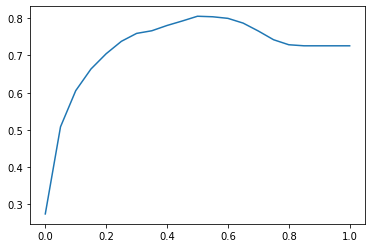

In [22]:
# Plot the list scores with accuracies
plt.plot(thresholds, scores) 
# x-axis is the thresholds
# y-axis is the scores

In [23]:
# doing the same above but now with sklearn:

# Import the package accuracy score from sklearn
from sklearn.metrics import accuracy_score

In [24]:
# Use the function accuracy score from sklearn
accuracy_score(y_val, churn_decision)

0.7260468417317246

In [25]:
# Use the function accuracy score from sklearn with the threshold list

# Use the function linspace to generate numbers from 0 to 1 with size of the array 21 elements
thresholds = np.linspace(0, 1, 21)

# Create a list to store all the accuracies
scores = []

# For eah of the values above we can treat as a threshold
for t in thresholds:

  # Store the result of the functin accuracy score
  score = accuracy_score(y_val, y_pred >= t)

  # Print the score with some formatation
  print('%.2f %.3f' % (t,score))

  # Append the list scores with accuracy
  scores.append(score)

# we can see below the values are exactly the same

0.00 0.274
0.05 0.508
0.10 0.605
0.15 0.664
0.20 0.705
0.25 0.738
0.30 0.759
0.35 0.767
0.40 0.781
0.45 0.793
0.50 0.806
0.55 0.804
0.60 0.800
0.65 0.787
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [26]:
# from the plot above we can see for the threshold above of 1.0
# we don't have more values the last score is 0.739 or 73.9% this accuracy its pretty decent
# remember our model was 80% accurate  
# but now with our dummy model is 73.9% where predicts how many customers are not churning

# Use a special package collections from Python to count things
from collections import Counter

# Use the function counter from collections to count how many are true or false
# the line below it predicts how many customers are not churning
Counter(y_pred >= 1.0)

# below we can see the counter only count false values

Counter({False: 1409})

In [27]:
# Confusion table:

# . Different types of errors and correct decisions
# . Arranging them in a table

# Create an array for customers are really churn and this is for case validations are 1
actual_positive = (y_val == 1)

# Create an array for customers are not going to churn and this is for case validations are 0
actual_negative = (y_val == 0)

# the arrays above they will store true's and falses values
actual_positive

array([False, False, False, ..., False,  True,  True])

In [28]:
# Define the threshold for positive and negative scores
t = 0.5

# Store the positive predictions
predict_positive = (y_pred >= t)

# Store the negative predictions
predict_negative = (y_pred < t)

# Combine in one the predictions and actual positives values
predict_positive & actual_positive
# note: the way it combines the trues and falses is:
# true and true is equal to true
# false and true is equal to false
# false and false is equal to false

# note: the & operator it computes the element wise logical end

array([False, False, False, ..., False,  True,  True])

In [29]:
# Check how many predictions and actual positives are
(predict_positive & actual_positive).sum()

212

In [30]:
# Store the true positive values in a variable
tp = (predict_positive & actual_positive).sum()
tp

212

In [31]:
# Store the true negatives values in a variable
tn = (predict_negative & actual_negative).sum()
tn

923

In [32]:
# Store the false positive values in a variable
fp = (predict_positive & actual_negative).sum()
fp

100

In [33]:
# Store the false negatives values in a variable
fn = (predict_negative & actual_positive).sum()
fn

174

In [34]:
# Create array with the confusion matrix
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

In [35]:
# Print the array with the confusion matrix
confusion_matrix

# below we can see the have more false negatives then false positives
# false positives are the customers get a promotional email
# even though they are not going to churn, so we actually lose some money
# by giving them the discount so they are not going to churn but we given them discount

# the false negative we don't send to the customers the email because they will leave
# where are losing profit because we do not mange to retain these customers and they leave

# we have different types of errors and the false negatives are more difficult to catch so
# we have a lot more false negatives than false positives so have this situation now we know
# what kind of errors the model makes

array([[923, 100],
       [174, 212]])

In [36]:
# to normalize the confusion matrix above instead of having absolute numbers we can have relative 
# numbers, so we can have percents

# Normalize the confusion matrix with percents
(confusion_matrix / confusion_matrix.sum()).round(2)

# 65% and 16% are correct predictions
# 9% and 11% are incorrect predictions

# we can conclude with our accuracy = 80% is 65% + 15% (not 16% because of the rouding)
# this is how we get our accuracy of 80%

array([[0.66, 0.07],
       [0.12, 0.15]])

In [37]:
# Precision and Recall:

# Precision and recall are metrics for evaluating binary classification models

# We can express accurcy as sum of true positive TP plus true negative TN
# and we divide that by the total number of all the observations which is:
# TP + TN + FP + FN

# Express accuracy of our model
(tp + tn) / (tp + tn + fp + fn)

0.8055358410220014

In [38]:
# Precision:

# Precision tell us how many positive predictions turned out to be correct
# or more like not how many but fraction of correct positive predictions 
# so it means that we predict some customers as churning and then out of those
# how many are identified correctly

# Precision tell us among those customers that we predicted as churning what is
# the fraction of correct predictions 

# Calculate the precision of our model
p = tp / (tp + fp)
p

0.6794871794871795

In [39]:
# the value above the 62% means we going to send a promotional email to 461 customers

# Print total of customers are true positive and false positive
tp + fp

312

In [40]:
# Print total of customers are going to churn
tp

212

In [41]:
# If precision is 62% it means that approximately 38% are mistakes
# so people who are not supposed to get this promotional email but 
# they get it anyway this is what precision can tell us

# Now lets see Recall Precision:
# Recall we look at fraction of churning customers that we identified correctly
# or positive examples

# Calculate the Recall Precision of our model
r = tp / (tp + fn)
r

0.5492227979274611

In [42]:
# Print total of customers are true positive and false negative
tp + fn

386

In [43]:
# The recall precision is 59% and 41% means customers that are churning we
# fail to identfy them

# Conclusion:
# Accuracy  = 80% 
# Precision = 62%  
# Recall    = 59% 

# Accuracy of 80% is pretty high number it feels our model must be very accurate
# but when we look at Precision and Recall we see that our model is not thaat good
# so for the purpose we want to use so we want to identify churning users so for
# this purpose accuracy is not the best metric because when we look at this we think
# okay model is doing pretty well but when look at precision and recall we see we
# failed to identify this customers and we actually sent a promotional email

# Accuracy can be misleading and that's why it's useful to look at metrics like precision and recall

In [44]:
# ROC Curves:

# ROC stands for receiver operating characteristics
# is a way of describing the performance of a binary classification model
# with ROCs we are interrested in two things or in two numbers:
# first number is FPR false positive rate
# second number is TPR true positive rate
# both these metrics are computed from the values of the confusion matrix

# Calculate the TPR true positive rate
tpr = tp / (tp + fn)
tpr

0.5492227979274611

In [45]:
# Print the recall we can see its same as TPR
r

0.5492227979274611

In [46]:
# Calculate the FPR false positive rate
fpr = fp / (fp + tn)
fpr

# the value below the 12% means that for all negative examples
# 12% are still predicted incorrectly

0.09775171065493646

In [47]:
# ROC is good because it looks at all the possible thresholds

# Create a list called scores
scores = []

# Compute the ROC for all possible thresholds using the function linspace
thresholds = np.linspace(0,1, 101)

# Create for loop using the thresholds list
for t in thresholds:

  # Create an array for customers are really churn and this is for case validations are 1
  actual_positive = (y_val == 1)

  # Create an array for customers are not going to churn and this is for case validations are 0
  actual_negative = (y_val == 0)

  # Store the positive predictions
  predict_positive = (y_pred >= t)

  # Store the negative predictions
  predict_negative = (y_pred < t)

  # Store the true positive values in a variable
  tp = (predict_positive & actual_positive).sum()

  # Store the true negatives values in a variable
  tn = (predict_negative & actual_negative).sum()

  # Store the false positive values in a variable
  fp = (predict_positive & actual_negative).sum()

  # Store the false negatives values in a variable
  fn = (predict_negative & actual_positive).sum()

  # Append a list called scores
  scores.append((t, tp, fp, fn, tn))

In [48]:
# Print the scores list with results from the ROC
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 385, 901, 1, 122),
 (0.02, 383, 808, 3, 215),
 (0.03, 382, 753, 4, 270),
 (0.04, 382, 714, 4, 309),
 (0.05, 379, 686, 7, 337),
 (0.06, 377, 656, 9, 367),
 (0.07, 375, 629, 11, 394),
 (0.08, 370, 596, 16, 427),
 (0.09, 370, 566, 16, 457),
 (0.1, 367, 537, 19, 486),
 (0.11, 364, 518, 22, 505),
 (0.12, 363, 496, 23, 527),
 (0.13, 361, 486, 25, 537),
 (0.14, 358, 461, 28, 562),
 (0.15, 353, 441, 33, 582),
 (0.16, 349, 429, 37, 594),
 (0.17, 347, 411, 39, 612),
 (0.18, 347, 398, 39, 625),
 (0.19, 342, 380, 44, 643),
 (0.2, 337, 367, 49, 656),
 (0.21, 332, 351, 54, 672),
 (0.22, 328, 337, 58, 686),
 (0.23, 322, 316, 64, 707),
 (0.24, 319, 307, 67, 716),
 (0.25, 314, 297, 72, 726),
 (0.26, 312, 287, 74, 736),
 (0.27, 310, 274, 76, 749),
 (0.28, 302, 261, 84, 762),
 (0.29, 299, 257, 87, 766),
 (0.3, 292, 245, 94, 778),
 (0.31, 289, 237, 97, 786),
 (0.32, 282, 235, 104, 788),
 (0.33, 279, 229, 107, 794),
 (0.34, 273, 220, 113, 803),
 (0.35000000000000003, 271, 2

In [49]:
# Turn the scores list with results from the ROC into a dataframe
pd.DataFrame(scores)

,0,1,2,3,4
0,0.00,386,1023,0,0
1,0.01,385,901,1,122
2,0.02,383,808,3,215
3,0.03,382,753,4,270
4,0.04,382,714,4,309
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [50]:
# Specify the columns names of the dataframe scores
columns = ['threshold','tp','fp','fn','tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,threshold,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,901,1,122
2,0.02,383,808,3,215
3,0.03,382,753,4,270
4,0.04,382,714,4,309
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [51]:
# Print the each tenth record of the scores dataframe
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,367,537,19,486
20,0.2,337,367,49,656
30,0.3,292,245,94,778
40,0.4,252,175,134,848
50,0.5,212,100,174,923
60,0.6,155,51,231,972
70,0.7,69,13,317,1010
80,0.8,4,0,382,1023
90,0.9,0,0,386,1023


In [52]:
# Compute the true positive rates of the dataframe scores
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)

# Compute the false positive rates of the dataframe scores
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [53]:
# Print the scores dataframe now with TPR and FPR each tenth record
df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,367,537,19,486,0.950777,0.524927
20,0.2,337,367,49,656,0.873057,0.358749
30,0.3,292,245,94,778,0.756477,0.239492
40,0.4,252,175,134,848,0.652850,0.171065
50,0.5,212,100,174,923,0.549223,0.097752
60,0.6,155,51,231,972,0.401554,0.049853
70,0.7,69,13,317,1010,0.178756,0.012708
80,0.8,4,0,382,1023,0.010363,0.000000
90,0.9,0,0,386,1023,0.000000,0.000000


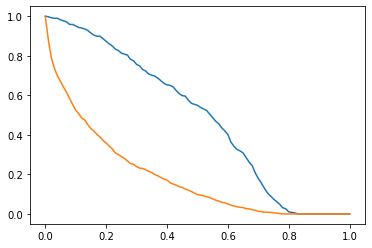

In [54]:
# Plot the scores of TPR and FPR
plt.plot(df_scores.threshold, df_scores['tpr'])
plt.plot(df_scores.threshold, df_scores['fpr'])

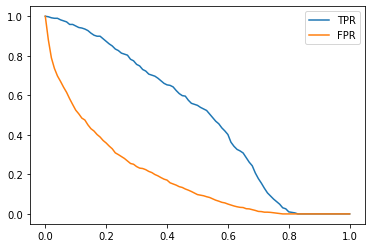

In [55]:
# Plot the scores of TPR and FPR with legends
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

# Interpretation of the plot below:
# at x-axis we have threshold
# for threshold of zero we see that both true positive rate and false positive rate are one
# so it means this is a diamond model that predicts everyone as churning so for them true positive rate
# is 100% because for all positive customers for all the churning customers all of them are identified correctly
# and again false positive rate is 100% for non churning ones we make 100% so we predict all of them incorrectly
# as churning

# and then we see that it goes down so the TPR go down with a different rate
# the FPR goes down faster and actually we want to go down as fast as possible because we want to minimize 
# the weight of values as low as possible

# and for TPR weight we want to keep it around one as higher as possible 

In [56]:
# Random model:

# now we want to use a random model for each customer basically flips a coin an thinks okay
# this customer is churnning this customer is not churning and make decisions whether this 
# customer is going to churn not completely randomly

# Implement the random model:

# Set the random seed for our Y rand variable  
np.random.seed(1)

# Assign every customer a random score between 0 and 1 usig the uniform distribution
# note: the size if the Y rand variable should be the same size as our validation dataset
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand.round(3)
# for each customer randomly predict if they are going to churn or not going to churn

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [57]:
# Caculate the accuracy for this model
((y_rand >= 0.5) == y_val).mean()

# for this model our accuracy is 47% 

0.5017743080198722

In [58]:
# Create a function TPR and FPR dataframe
def tpr_fpr_dataframe(y_val, y_pred):

  # Create a list called scores
  scores = []

  # Compute the ROC for all possible thresholds using the function linspace
  thresholds = np.linspace(0,1, 101)

  # Create for loop using the thresholds list
  for t in thresholds:

    # Create an array for customers are really churn and this is for case validations are 1
    actual_positive = (y_val == 1)

    # Create an array for customers are not going to churn and this is for case validations are 0
    actual_negative = (y_val == 0)

    # Store the positive predictions
    predict_positive = (y_pred >= t)

    # Store the negative predictions
    predict_negative = (y_pred < t)

    # Store the true positive values in a variable
    tp = (predict_positive & actual_positive).sum()

    # Store the true negatives values in a variable
    tn = (predict_negative & actual_negative).sum()

    # Store the false positive values in a variable
    fp = (predict_positive & actual_negative).sum()

    # Store the false negatives values in a variable
    fn = (predict_negative & actual_positive).sum()

    # Append a list called scores
    scores.append((t, tp, fp, fn, tn))

  # Specify the columns names of the dataframe scores
  columns = ['threshold','tp','fp','fn','tn']
  df_scores = pd.DataFrame(scores, columns=columns)

  # Compute the true positive rates of the dataframe scores
  df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)

  # Compute the false positive rates of the dataframe scores
  df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

  # Return the scores dataframe
  return df_scores

In [59]:
# Use the function TPR and FPR dataframe with random predictions
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [60]:
# Print the rand dataframe every tenth record
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


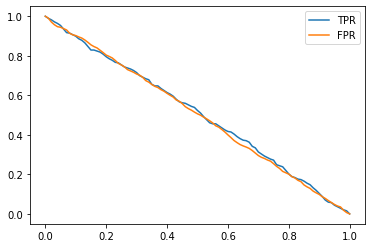

In [61]:
# Plot the rand of TPR and FPR with legends
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

# we can see TPR and FPR that both of them go down it's almost a straight line 

In [62]:
# lets see now a different benchmark so for this one we want to talk about
# the ideal model some model that gets outputs the correct prediction for everyone

# Count and store how many customers are not churning
# we need to count how many zeros are in the dataset
num_neg = (y_val == 0).sum()

# Count and store how many customers are churning
# we need to count how many ones are in the dataset
num_pos = (y_val == 1).sum()

# Print the total of customer are churning and not churning
num_neg, num_pos

(1023, 386)

In [63]:
# Create a variable to store numbers of positive and negative customers churn
# use the function repeat zero or one according the totals of num_neg and num_pos
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal
# the array below has first zeros followed by ones and this is our validation datset in a way
# we know everything is ordered

array([0, 0, 0, ..., 1, 1, 1])

In [64]:
# now we need to create our predictions and predictions can be just numbers between zero and one

# Use the linspace function using the length of Y validation
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred

array([0.00000000e+00, 7.10227273e-04, 1.42045455e-03, ...,
       9.98579545e-01, 9.99289773e-01, 1.00000000e+00])

In [65]:
# Calculate the right threshold to get 100% accuracy
1 - y_val.mean()
# so it predicts that for customers above this threshold (number below) they are positive
# below negative the threshold it happens to be correct for all the customers because this
# is how we prepared our actual values and our predictions so this is how ideal our model
# looks like and of course this model doesn't exist in reality but this will help to benchmark
# our model that we have against this one

0.7260468417317246

In [66]:
# Look for customers with the threshold of 73.87%
((y_ideal_pred >= 0.7387) == y_ideal).mean()
# for this customers the accuracy is 100%

0.9872249822569198

In [67]:
# lets do the same exercise for the ideal model as we did for the random model

# Use the function TPR and FPR dataframe with ideal model
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [68]:
# Print the ideal dataframe every tenth record
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


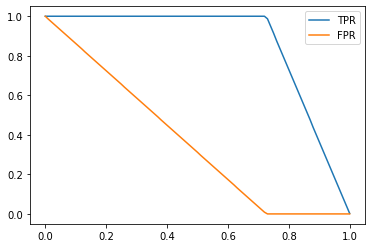

In [69]:
# Plot the ideal of TPR and FPR with legends
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

# we can see on the plot below is true positive rate all always almost always stays
# aroud one so this is ideal scenario and then starts to go down after the threshold of 73.87%
# so this model can identify so for true positive rate so this model can identify the churning customers
# correctly for customers are not churning when it says they are churning it's not always true 
# it becomes true when it crosses the threshold of 73.87%

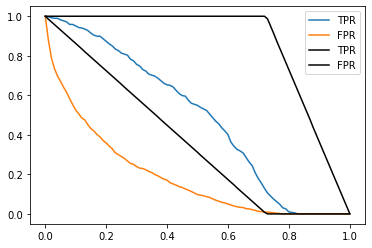

In [70]:
# so this is how ideal model looks like and we can try to plot all our models together so we can
# hold the benchmarks together:

# Plot the scores of TPR and FPR
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

# Plot the rand of TPR and FPR
# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')

# Plot the ideal of TPR and FPR
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color='black')

# Plot the dataframes score, random and ideal with legends
plt.legend()

# below we can see FPR orange line and TPR the blue line both are quite far from the TPR and FPR black lines
# so the scores model are farway from the ideal model
# note: the threshold is not always intuitive because for example for this model we have for our model the best
# threshold is 0.5 or 50% at least in terms of accuracy but for this model the best threshold is 73.87%
# or 0.7378 so they have different thresholds and what we can do however is to plot false positive rate again
# true positive rate so in a slightly different manner

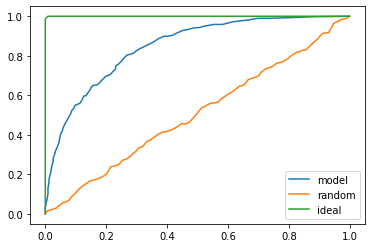

In [71]:
# so we don't plot the threshold we just look at only true positive rate and false positive rate:

# Plot the FPR and TPR of the scores dataframe
plt.plot(df_scores.fpr, df_scores.tpr, label='model')

# Plot the FPR and TPR of the random dataframe
plt.plot(df_rand.fpr, df_rand.tpr, label='random')

# Plot the FPR and TPR of the ideal dataframe
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

# Plot the dataframes score, random and ideal with legends
plt.legend()

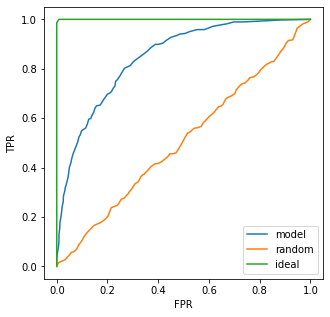

In [72]:
# usually the ROC Curves are square not like rectangular like we have above
# and for that we need to specify the size of our plot so for that we need to specify the size 
# of our plot using the function figure

# Use the function figure to have a ROC Curve square
plt.figure(figsize=(5,5))

# Plot the FPR and TPR of the scores dataframe
plt.plot(df_scores.fpr, df_scores.tpr, label='model')

# Plot the FPR and TPR of the random dataframe
plt.plot(df_rand.fpr, df_rand.tpr, label='random')

# Plot the FPR and TPR of the ideal dataframe
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

# Label the plot with x-axis and y-axis
plt.xlabel('FPR')
plt.ylabel('TPR')

# Plot the dataframes score, random and ideal with legends
plt.legend()

# now its squared and what we see below is our random model and TPR and FPR
# they move together so that's why it's kind of a stright line between zero and one
# we have some fluctuations simple because this is a random model sometimes it by chance
# gets a bit more accurate sometimes it gets a bit less accurate that's wahy there are some
# limitations and then also interested is to see the ideal model when TPR is 1.0 or 100%
# and FPR is 0.0 or 0% and this is for a threshold of 73.87% or 0.7378 and this is like the 
# ideal spot and we can call the north star and thi is where we want to get 

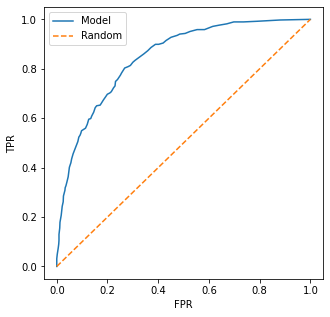

In [73]:
# so we can plot a simplified version of the plot above:

# Use the function figure to have a ROC Curve square
plt.figure(figsize=(5,5))

# Plot the FPR and TPR of the scores dataframe
plt.plot(df_scores.fpr, df_scores.tpr, label='Model')

# we don't need to plot the random model like we did with our previous model
# so what we can do is just plot a line between zero and one
# note: we dont need to plot the ideal model because we know how it looks like
# Plot the random model a line between zero and one
plt.plot([0,1], [0,1], label='Random', linestyle='--')

# Label the plot with x-axis and y-axis
plt.xlabel('FPR')
plt.ylabel('TPR')

# Plot the dataframes model and random with legends
plt.legend()

# Plot a simplified version of the previous plot:
# this is how ROC Curve looks like and plot TPR against FPR and we add this random baseline with
# color orange and we want our curve (the model) to be as close as possible to the ideal spot called 
# the north star and as far as possible from the random baseline 
# if our model is somewhere close to the random baseline then it's not a good model so we want to be
# as close as possible to the ideal spot or the north star and here is where we don't make no mistakes
# and of course our model makes mistakes and that's why the ROC Curve for our model looks like that

In [74]:
# Use sklearn instead of doing the plot above:

# Import the package ROC Curve from sklearn
from sklearn.metrics import roc_curve

In [75]:
# Create the values FPR, TPR and use function ROC Curve with y_val and y_pred
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

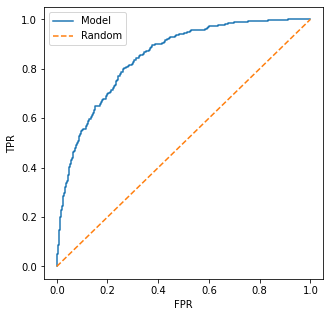

In [76]:
# so we can plot a simplified version of the plot above using sklearn:

# Use the function figure to have a ROC Curve square
plt.figure(figsize=(5,5))

# Plot the FPR and TPR of the scores dataframe
plt.plot(fpr, tpr, label='Model')

# we don't need to plot the random model like we did with our previous model
# so what we can do is just plot a line between zero and one
# note: we dont need to plot the ideal model because we know how it looks like
# Plot the random model a line between zero and one
plt.plot([0,1], [0,1], label='Random', linestyle='--')

# Label the plot with x-axis and y-axis
plt.xlabel('FPR')
plt.ylabel('TPR')

# Plot the dataframes model and random with legends
plt.legend()

# Plot the same plot like before but now using sklearn library
# we can see below it's a little bit more bumpy it's less smooth than the previous plot
# because before we just use 101 thresholds and now with sklearn its more accurate because
# it evaluates the model on more thresholds

In [77]:
# ROC AUC:

# . Area under the ROC Curve - Useful Metric
# . Interpretation of AUC

# Use sklearn library with the function called AUC
from sklearn.metrics import auc

In [78]:
# Use AUC function with FPR and TPR
# the AUC computes the area under the curve
auc(fpr, tpr)

0.8465981898206534

In [79]:
# Calculate the AUC for our model
auc(df_scores.fpr, df_scores.tpr)
# we can see our model it's pretty close it's actually almost the same value

0.8463208889834327

In [80]:
# Calculate the AUC for our ideal model
auc(df_ideal.fpr, df_ideal.tpr)
# we can see it's very close to one but it's not one 

0.9999430203759136

In [81]:
# Compute the area under the ROC Curve:

# Create the values FPR, TPR and use function ROC Curve with y_val and y_pred
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# Calculate the AUC for our model
auc(df_scores.fpr, df_scores.tpr)

0.8463208889834327

In [82]:
# Short code with sklearn using the function ROC AUC Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8465981898206534

In [83]:
# Store all the scores from negative and positives examples
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [84]:
# Select randomly a positive example
import random
pos_ind = random.randint(0, len(pos) - 1)
pos_ind

337

In [85]:
# Select randomly a negative example
neg_ind = random.randint(0, len(neg) - 1)
neg_ind

172

In [86]:
# Compare the score for positive example with the score for the negative example
pos[pos_ind] > neg[neg_ind]

True

In [87]:
# Repeat the same code above 100k times
n = 100_000
success = 0

for i in range(n):
  pos_ind = random.randint(0, len(pos) - 1)
  neg_ind = random.randint(0, len(pos) - 1)  

  # Check positive example has a higher score than negative example
  if pos[pos_ind] > neg[neg_ind]:
    success = success + 1

# Print the ratio how many times the score for positive example was greater than negative examples
success / n

0.85199

In [88]:
# Implement the same code now with numpy
# use the numpy we don't need the for loop
n = 50_000

np.random.seed(1)

pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

# Calculate the rate of positive examples
(pos[pos_ind] > neg[neg_ind]).mean()

0.84892

In [89]:
# Cross-Validation:

# . Evaluating the same model on different sbsets of data
# . Getting the average prediction and the spread witin predictions

# Create a function for training
def train(df_train, y_train, C=1.0):

  # Create dictionaries that extract from our dataframe categoricl and numerical variables
  dicts = df_train[categorical + numerical].to_dict(orient='records')

  # Create a new instance of the DictVectorizer class without sparse
  dv = DictVectorizer(sparse=False)

  # Use the function transform with our DictVectorizer
  X_train = dv.fit_transform(dicts)

  # Create a model logistic regression and define the parameter
  # C is the parameter tuning of our model 
  # this C is equivalent to the regularization parameter
  # the default one is one (1.0)
  # max_iter is the maximum duration 
  model = LogisticRegression(C=C, max_iter=1000)

  # For training the model we use the fit method
  model.fit(X_train, y_train)
   
  # because the vectorizer knows how to transform our dictionaries into feature matrix
  # and then the model knows what to do with them after they are transformed
  return dv, model

In [90]:
# Call function train and store results of dv and model
# we set C to 0.001 if we want to train the model with a lot of regularization
dv, model = train(df_train, y_train, C=0.001)

In [91]:
# Create a function for predict
def predict(df, dv, model):

  # Convert the dataframe into a list of dictionaries
  dicts = df[categorical + numerical].to_dict(orient='records')

  # Creates the feature matrix using the vectorizer
  X = dv.transform((dicts))

  # Use the model predict proba and take the second column
  y_pred = model.predict_proba(X)[:, 1]

  # Return our prediction
  return y_pred

In [92]:
# Call the function predict and use with our validation datset
y_pred = predict(df_val, dv, model)
y_pred
# it returns a numpy array with predictions

array([0.02155921, 0.33135098, 0.33602112, ..., 0.26705435, 0.71907523,
       0.71942517])

In [93]:
# Use the KFold package from sklearn model selection
from sklearn.model_selection import KFold

In [94]:
# Use the function KFold to split the data in 10 parts
# note: random state is the seed
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [95]:
# Use the split method that takes our full train dataframe
kfold.split(df_train)

<generator object _BaseKFold.split at 0x7f0b0527ed50>

In [96]:
# Use the method next to see what's inside
train_idx, val_idx = next(kfold.split(df_train))
train_idx, val_idx
# it returns two arrays the first one is the indexes for the train part
# and then indexes for the validation part 

(array([   0,    2,    3, ..., 4222, 4223, 4224]),
 array([   1,   13,   17,   21,   40,   44,   58,   62,   93,   94,   98,
          99,  102,  108,  111,  115,  123,  136,  161,  181,  200,  210,
         219,  230,  280,  292,  299,  306,  330,  331,  345,  359,  366,
         368,  385,  407,  438,  443,  453,  486,  494,  495,  518,  534,
         544,  555,  557,  560,  577,  592,  605,  608,  632,  636,  644,
         645,  661,  662,  664,  671,  678,  695,  709,  710,  718,  745,
         748,  756,  761,  763,  769,  771,  772,  773,  778,  779,  784,
         799,  804,  823,  834,  846,  857,  881,  891,  893,  906,  921,
         929,  936,  941,  945,  955,  957,  960,  968,  986,  988,  993,
         994,  996, 1004, 1006, 1012, 1020, 1030, 1034, 1060, 1064, 1073,
        1078, 1087, 1089, 1104, 1122, 1126, 1140, 1164, 1167, 1173, 1179,
        1189, 1217, 1227, 1247, 1248, 1255, 1291, 1322, 1330, 1373, 1375,
        1379, 1380, 1381, 1400, 1406, 1410, 1417, 1419, 1435,

In [97]:
# Check the lenght of both indexes created
len(train_idx), len(val_idx)

(3802, 423)

In [98]:
# Check the lenght of our full train dataframe
len(df_train)
# note: the lenght below is the total of the above arrays of indexes

4225

In [99]:
# Install TQDM to see progress of each iterations of a loop
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [100]:
# Import the library of TQDM
from tqdm.auto import tqdm

In [101]:
# Declare how many splits we will do with dataframe
n_splits = 5

# Create for loop that save the results after each iteraction we evaluate the model
# use c to iterate over different values of C 
for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):

  # Use the function KFold to split the data in 5 parts
  kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

  # Create a list with scores
  scores = []

  # Iterate over the full train dataframe using the function split together with train and val indexes
  for train_idx, val_idx in kfold.split(df_full_train):

    # Use iloc to select a part of the full train dataframe for train
    df_train = df_full_train.iloc[train_idx]

    # Use iloc to select a part of the full train dataframe for validation
    df_val = df_full_train.iloc[val_idx]

    # Store the churn values with y train and validation
    y_train = df_full_train.churn.values
    y_val = df_val.churn.values

    # Call function train and store results of dv and model
    dv, model = train(df_full_train, y_train)

    # Call the function predict and use with our validation datset
    y_pred = predict(df_val, dv, model)

    # Compute and store the ROC AUC score
    auc = roc_auc_score(y_val, y_pred)

    # After evaluate the model we store the results
    scores.append(auc)

  # Print the mean score and standard deviation
  print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  # below we can see the average score across all splits and its 84.3% 
  # and then the spead standard deviation is 0.008% 

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.843 +- 0.008
C=0.01 0.843 +- 0.008
C=0.1 0.843 +- 0.008
C=0.5 0.843 +- 0.008
C=1 0.843 +- 0.008
C=5 0.843 +- 0.008
C=10 0.843 +- 0.008


In [102]:
# Print the scores we got by evaluating our model
scores

[0.8474970759315806,
 0.847960948880943,
 0.8337788480834838,
 0.8329183187312144,
 0.8539071569765617]

In [105]:
# Compute the mean score and standard deviation
np.mean(scores), np.std(scores)
# below we can see the average score across all splits and its 84.3% 
# and then the spead standard deviation is 0.008% 

(0.8432124697207566, 0.00836952808713552)

In [107]:
# Train our final model on the full train dataset and validate on the test dataset

# Call function train and store results of dv and model
dv, model = train(df_full_train, df_full_train.churn.values, C=C)

# Call the function predict and use with our validation datset
y_pred = predict(df_test, dv, model)

# Compute and store the ROC AUC score
auc = roc_auc_score(y_test, y_pred)
auc
# we can see the AUC 85.8% is a litte bit better than what we before with 84.3% 
# the AUC below if it was a bit lower it also be good as long it's not that drastic change
# one or two percent it's okay  

0.858934046172013